In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np

import data

from matplotlib import pyplot as plt

#%matplotlib widget

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: cannot open shared object file: No such file or directory']
  warnings.warn(f"file s

In [2]:
dfo = data.merged()

## Explore the dataset

First, lets pick only the temperatures (for now, the rest looks messy and I don't wanna deal with that at this time)

In [3]:
cols = [
    'T3(Warm Water Header - In) (°C)',
    'T4(Warm Water Header - Out) (°C)',
    'T5(Chill Water Header - Out) (°C)',
    'T6(Chill Water Header - In) (°C)',
    'T7(Ground Source Loop - In) (°C)',
    'T8(Ground Source Loop - Out) (°C)',
]

df = dfo[cols].head(150000)

In [4]:
df

,T3(Warm Water Header - In) (°C),T4(Warm Water Header - Out) (°C),T5(Chill Water Header - Out) (°C),T6(Chill Water Header - In) (°C),T7(Ground Source Loop - In) (°C),T8(Ground Source Loop - Out) (°C)
DATE &TIME,,,,,,
2010-02-01 00:00:45.752,39.172123,38.691460,10.200813,11.972402,11.884285,11.729026
2010-02-01 00:01:45.752,39.108808,38.608212,10.220193,11.669458,11.884384,11.732222
2010-02-01 00:02:45.752,39.113483,38.515146,10.239061,11.878089,11.887980,11.730025
2010-02-01 00:03:45.752,38.927906,38.421467,10.256390,12.061815,11.889978,11.733120
2010-02-01 00:04:45.752,38.798430,38.365730,10.277821,11.922081,11.895671,11.734818
...,...,...,...,...,...,...
2010-05-16 04:55:05.734,44.231773,44.090702,10.321708,9.375077,13.055378,13.894490
2010-05-16 04:56:05.734,44.185226,44.060839,10.331654,9.371709,13.055777,13.889597
2010-05-16 04:57:05.734,44.173234,44.043146,10.340678,9.378282,13.064866,13.896887


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T3(Warm Water Header - In) (°C),150000.0,36.878401,31.598972,-99.0,44.401266,46.152377,46.832383,55.516158
T4(Warm Water Header - Out) (°C),150000.0,36.298643,31.252295,-99.0,43.755435,45.018904,45.717945,51.960992
T5(Chill Water Header - Out) (°C),150000.0,5.324950,24.072579,-99.0,9.051576,9.446991,10.015626,28.300764
T6(Chill Water Header - In) (°C),150000.0,4.216308,23.809259,-99.0,7.800474,8.680777,9.313560,32.305868
T7(Ground Source Loop - In) (°C),150000.0,8.815882,24.703478,-99.0,12.219032,14.418340,15.687815,38.758297
T8(Ground Source Loop - Out) (°C),150000.0,7.882141,24.384312,-99.0,12.391298,13.114634,14.186880,18.370315


## Replace missing values

In [6]:
df = df.mask(df < -90, 0)
df = df.mask(df.isna(), 0)

In [7]:
print(df.describe().transpose())

                                      count       mean        std     min  \
T3(Warm Water Header - In) (°C)    150000.0  41.772301  11.361535 -0.3341   
T4(Warm Water Header - Out) (°C)   150000.0  41.192543  10.628734 -0.4937   
T5(Chill Water Header - Out) (°C)  150000.0  10.218850   4.349647 -0.6835   
T6(Chill Water Header - In) (°C)   150000.0   9.110208   4.142754 -0.5670   
T7(Ground Source Loop - In) (°C)   150000.0  13.703182   4.044470  0.0000   
T8(Ground Source Loop - Out) (°C)  150000.0  12.769441   3.133302  0.0000   

                                         25%        50%        75%        max  
T3(Warm Water Header - In) (°C)    44.401266  46.152377  46.832383  55.516158  
T4(Warm Water Header - Out) (°C)   43.755435  45.018904  45.717945  51.960992  
T5(Chill Water Header - Out) (°C)   9.051576   9.446991  10.015626  28.300764  
T6(Chill Water Header - In) (°C)    7.800474   8.680777   9.313560  32.305868  
T7(Ground Source Loop - In) (°C)   12.219032  14.418340  15.

In [8]:
#df.plot()

## Prepare the data
Split

In [9]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

Normalize

In [10]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [11]:
"""df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure()
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ =ax.set_xticklabels(df.keys(), rotation=90)
"""

"df_std = (df - train_mean) / train_std\ndf_std = df_std.melt(var_name='Column', value_name='Normalized')\nplt.figure()\nax = sns.violinplot(x='Column', y='Normalized', data=df_std)\n_ =ax.set_xticklabels(df.keys(), rotation=90)\n"

In [12]:
class WindowGenerator:
    def __init__(
        self,
        input_width,
        label_width,
        shift,
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        label_columns=None,
    ):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {
                name: i for i, name in enumerate(label_columns)
            }
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return "\n".join(
            [
                f"Total window size: {self.total_window_size}",
                f"Input indices: {self.input_indices}",
                f"Label indices: {self.label_indices}",
                f"Label column name(s): {self.label_columns}",
            ]
        )

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [
                    labels[:, :, self.column_indices[name]]
                    for name in self.label_columns
                ],
                axis=-1,
            )

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col="T (degC)", max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n + 1)
            plt.ylabel(f"{plot_col} [normed]")
            plt.plot(
                self.input_indices,
                inputs[n, :, plot_col_index],
                label="Inputs",
                marker=".",
                zorder=-10,
            )

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(
                self.label_indices,
                labels[n, :, label_col_index],
                edgecolors="k",
                label="Labels",
                c="#2ca02c",
                s=64,
            )
            if model is not None:
                predictions = model(inputs)
                plt.scatter(
                    self.label_indices,
                    predictions[n, :, label_col_index],
                    marker="X",
                    edgecolors="k",
                    label="Predictions",
                    c="#ff7f0e",
                    s=64,
                )

            if n == 0:
                plt.legend()

        plt.xlabel("Time")

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=512,
        )

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)


    @property
    def val(self):
        return self.make_dataset(self.val_df)


    @property
    def test(self):
        return self.make_dataset(self.test_df)


    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, "_example", None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

In [13]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history


Total window size: 180
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
Label indices: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179]
Label column name(s): None

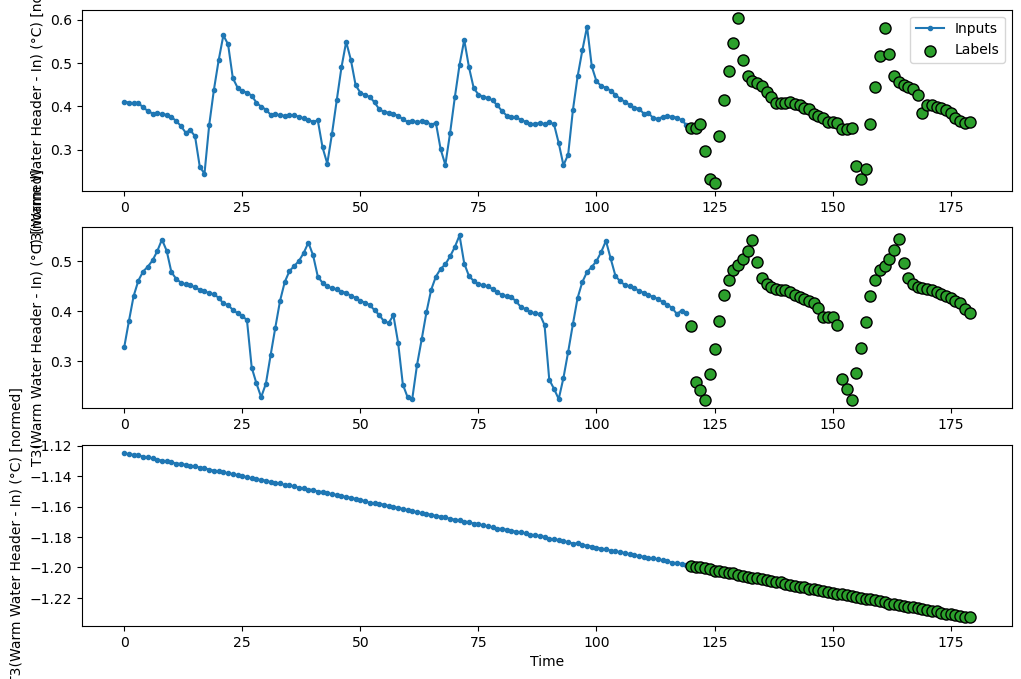

In [14]:
OUT_STEPS = 60
multi_window = WindowGenerator(input_width=120,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot(plot_col=df.columns[0])
multi_window

## Eval

In [15]:
multi_val_performance = {}
multi_performance = {}


c1d-20-0.1-512
Epoch 1/20
205/205 [==============================] - 17s 74ms/step - loss: 0.1203 - mean_absolute_error: 0.1845 - val_loss: 0.0575 - val_mean_absolute_error: 0.1633
Epoch 2/20
205/205 [==============================] - 15s 72ms/step - loss: 0.0745 - mean_absolute_error: 0.1449 - val_loss: 0.0401 - val_mean_absolute_error: 0.1283
Epoch 3/20
205/205 [==============================] - 15s 71ms/step - loss: 0.0688 - mean_absolute_error: 0.1365 - val_loss: 0.0404 - val_mean_absolute_error: 0.1311
Epoch 4/20
205/205 [==============================] - 15s 71ms/step - loss: 0.0671 - mean_absolute_error: 0.1343 - val_loss: 0.0401 - val_mean_absolute_error: 0.1284
Epoch 5/20
205/205 [==============================] - 15s 73ms/step - loss: 0.0661 - mean_absolute_error: 0.1327 - val_loss: 0.0415 - val_mean_absolute_error: 0.1319
Epoch 6/20
59/59 [==============================] - 2s 37ms/step - loss: 0.0412 - mean_absolute_error: 0.1332


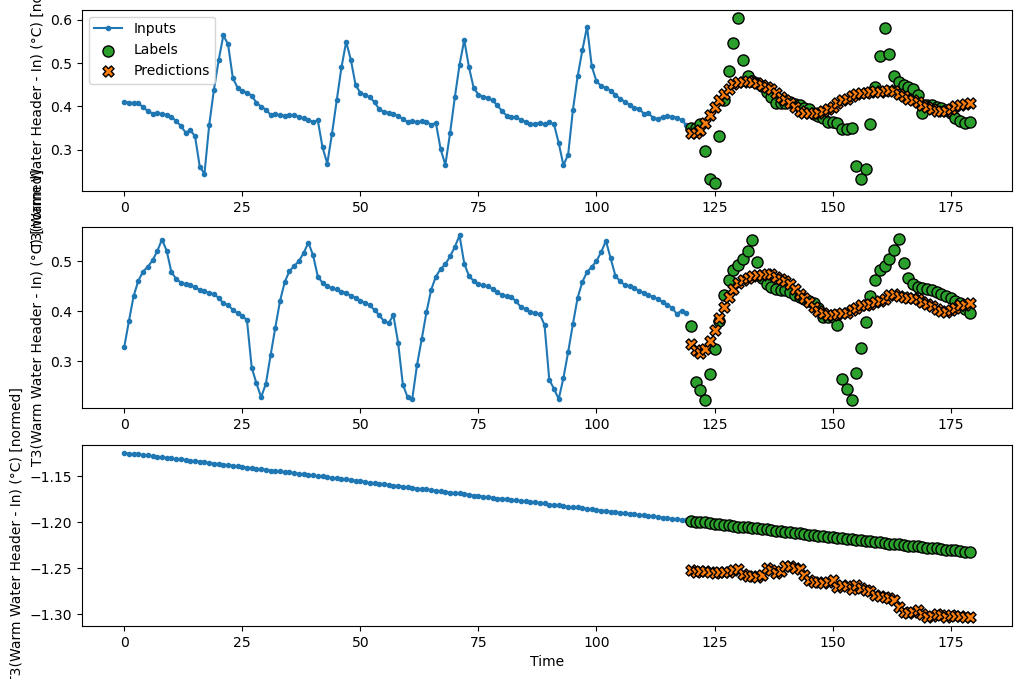

c1d-20-0.1-1024
Epoch 1/20
205/205 [==============================] - 30s 138ms/step - loss: 0.1097 - mean_absolute_error: 0.1768 - val_loss: 0.0528 - val_mean_absolute_error: 0.1532
Epoch 2/20
205/205 [==============================] - 29s 138ms/step - loss: 0.0712 - mean_absolute_error: 0.1404 - val_loss: 0.0448 - val_mean_absolute_error: 0.1416
Epoch 3/20
205/205 [==============================] - 28s 136ms/step - loss: 0.0678 - mean_absolute_error: 0.1349 - val_loss: 0.0422 - val_mean_absolute_error: 0.1360
Epoch 4/20
205/205 [==============================] - 29s 139ms/step - loss: 0.0664 - mean_absolute_error: 0.1329 - val_loss: 0.0434 - val_mean_absolute_error: 0.1348
Epoch 5/20
205/205 [==============================] - 29s 138ms/step - loss: 0.0659 - mean_absolute_error: 0.1322 - val_loss: 0.0421 - val_mean_absolute_error: 0.1416
Epoch 6/20
205/205 [==============================] - 28s 137ms/step - loss: 0.0618 - mean_absolute_error: 0.1254 - val_loss: 0.0403 - val_mean_absol

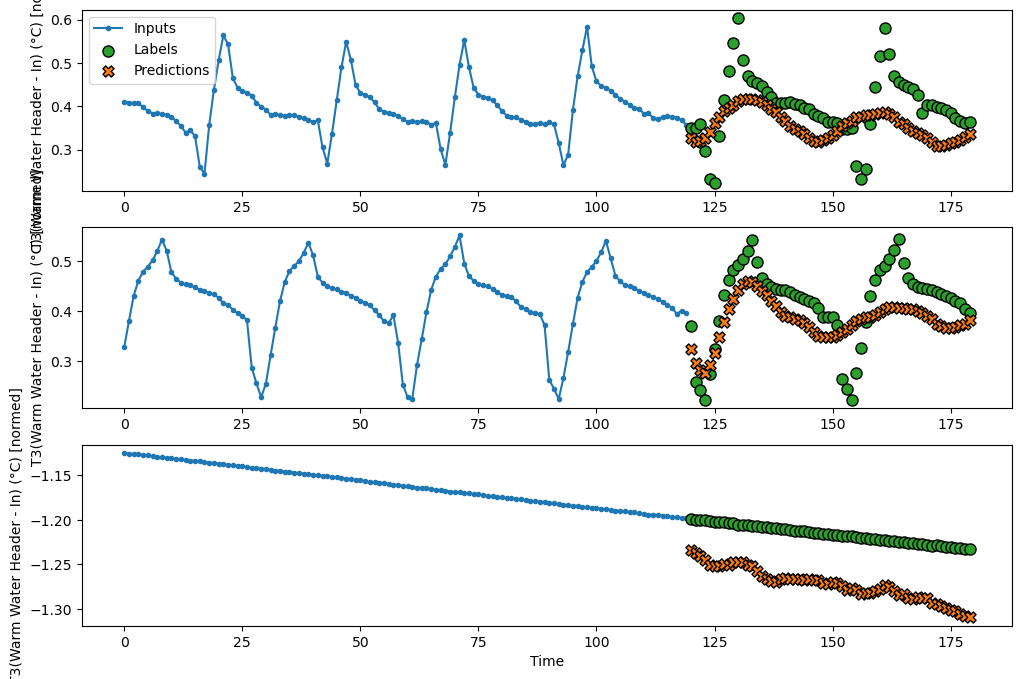

c1d-20-0.1-2048
Epoch 1/20
205/205 [==============================] - 80s 380ms/step - loss: 0.1243 - mean_absolute_error: 0.1815 - val_loss: 0.0469 - val_mean_absolute_error: 0.1458
Epoch 2/20
205/205 [==============================] - 78s 379ms/step - loss: 0.0720 - mean_absolute_error: 0.1403 - val_loss: 0.0419 - val_mean_absolute_error: 0.1372
Epoch 3/20
205/205 [==============================] - 78s 380ms/step - loss: 0.0670 - mean_absolute_error: 0.1326 - val_loss: 0.0451 - val_mean_absolute_error: 0.1393
Epoch 4/20
59/59 [==============================] - 7s 115ms/step - loss: 0.0435 - mean_absolute_error: 0.1365


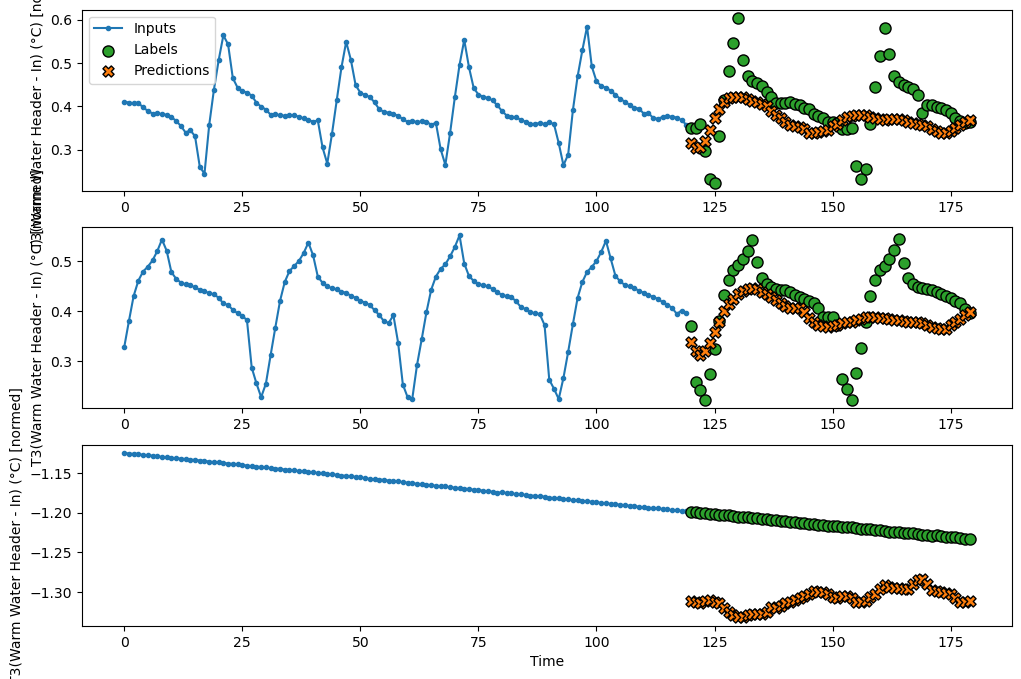

c1d-20-0.1-512
Epoch 1/20
205/205 [==============================] - 27s 119ms/step - loss: 0.2032 - mean_absolute_error: 0.2511 - val_loss: 0.0909 - val_mean_absolute_error: 0.2210
Epoch 2/20
205/205 [==============================] - 24s 118ms/step - loss: 0.0891 - mean_absolute_error: 0.1676 - val_loss: 0.0608 - val_mean_absolute_error: 0.1672
Epoch 3/20
205/205 [==============================] - 24s 117ms/step - loss: 0.0832 - mean_absolute_error: 0.1592 - val_loss: 0.0547 - val_mean_absolute_error: 0.1599
Epoch 4/20
205/205 [==============================] - 24s 117ms/step - loss: 0.0775 - mean_absolute_error: 0.1526 - val_loss: 0.0639 - val_mean_absolute_error: 0.1781
Epoch 5/20
205/205 [==============================] - 25s 118ms/step - loss: 0.0783 - mean_absolute_error: 0.1535 - val_loss: 0.0533 - val_mean_absolute_error: 0.1577
Epoch 6/20
205/205 [==============================] - 24s 117ms/step - loss: 0.0738 - mean_absolute_error: 0.1471 - val_loss: 0.0594 - val_mean_absolu

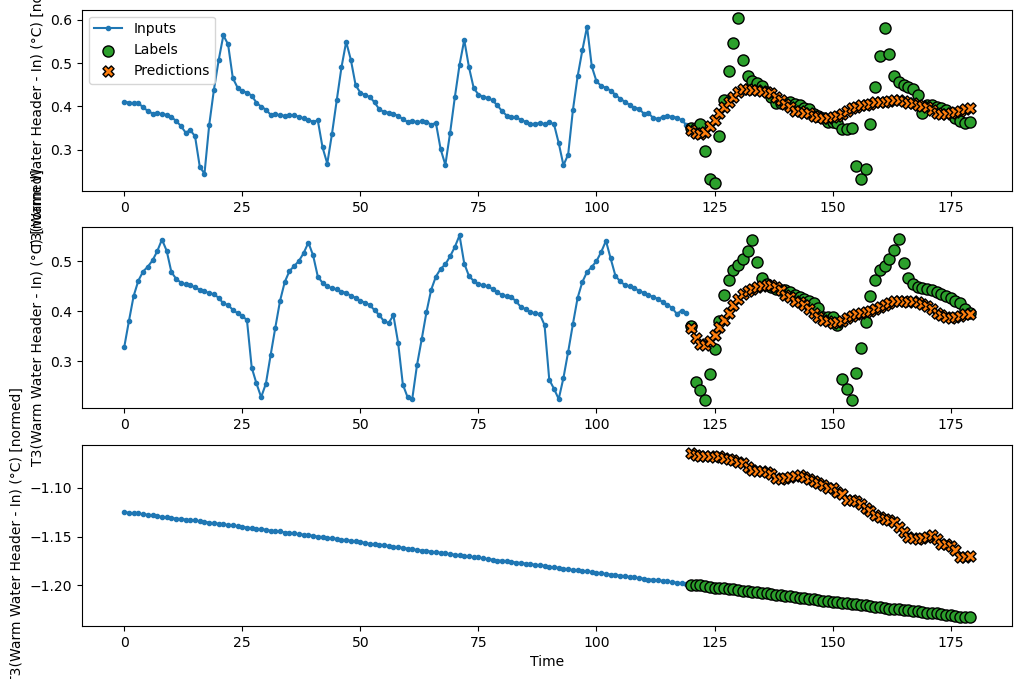

c1d-20-0.1-1024
Epoch 1/20
205/205 [==============================] - 63s 295ms/step - loss: 0.1985 - mean_absolute_error: 0.2439 - val_loss: 0.1390 - val_mean_absolute_error: 0.2419
Epoch 2/20
205/205 [==============================] - 61s 295ms/step - loss: 0.0919 - mean_absolute_error: 0.1695 - val_loss: 0.0622 - val_mean_absolute_error: 0.1770
Epoch 3/20
205/205 [==============================] - 61s 295ms/step - loss: 0.0840 - mean_absolute_error: 0.1609 - val_loss: 0.0539 - val_mean_absolute_error: 0.1591
Epoch 4/20
205/205 [==============================] - 61s 294ms/step - loss: 0.0767 - mean_absolute_error: 0.1506 - val_loss: 0.0507 - val_mean_absolute_error: 0.1533
Epoch 5/20
205/205 [==============================] - 61s 294ms/step - loss: 0.0767 - mean_absolute_error: 0.1496 - val_loss: 0.0593 - val_mean_absolute_error: 0.1694
Epoch 6/20
59/59 [==============================] - 6s 94ms/step - loss: 0.0597 - mean_absolute_error: 0.1721


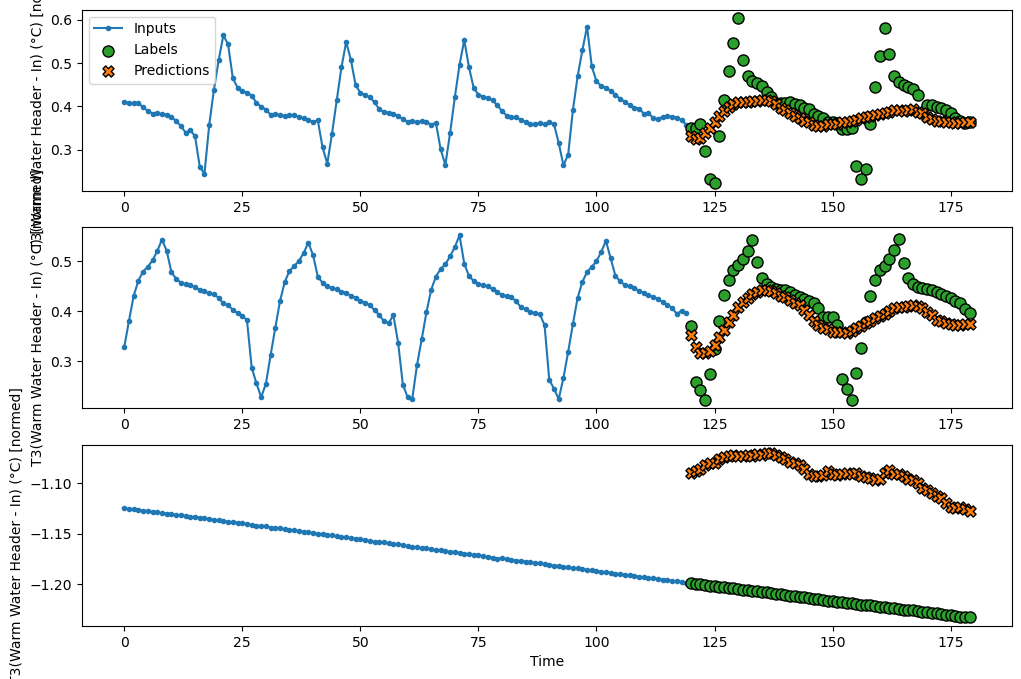

c1d-20-0.1-2048
Epoch 1/20
205/205 [==============================] - 202s 971ms/step - loss: 0.4368 - mean_absolute_error: 0.2599 - val_loss: 0.0728 - val_mean_absolute_error: 0.1849
Epoch 2/20
205/205 [==============================] - 198s 967ms/step - loss: 0.0878 - mean_absolute_error: 0.1635 - val_loss: 0.0674 - val_mean_absolute_error: 0.1771
Epoch 3/20
205/205 [==============================] - 199s 972ms/step - loss: 0.0824 - mean_absolute_error: 0.1576 - val_loss: 0.0673 - val_mean_absolute_error: 0.1864
Epoch 4/20
205/205 [==============================] - 198s 966ms/step - loss: 0.0794 - mean_absolute_error: 0.1542 - val_loss: 0.0600 - val_mean_absolute_error: 0.1711
Epoch 5/20
205/205 [==============================] - 198s 965ms/step - loss: 0.0778 - mean_absolute_error: 0.1511 - val_loss: 0.0604 - val_mean_absolute_error: 0.1691
Epoch 6/20
59/59 [==============================] - 17s 278ms/step - loss: 0.0672 - mean_absolute_error: 0.1809


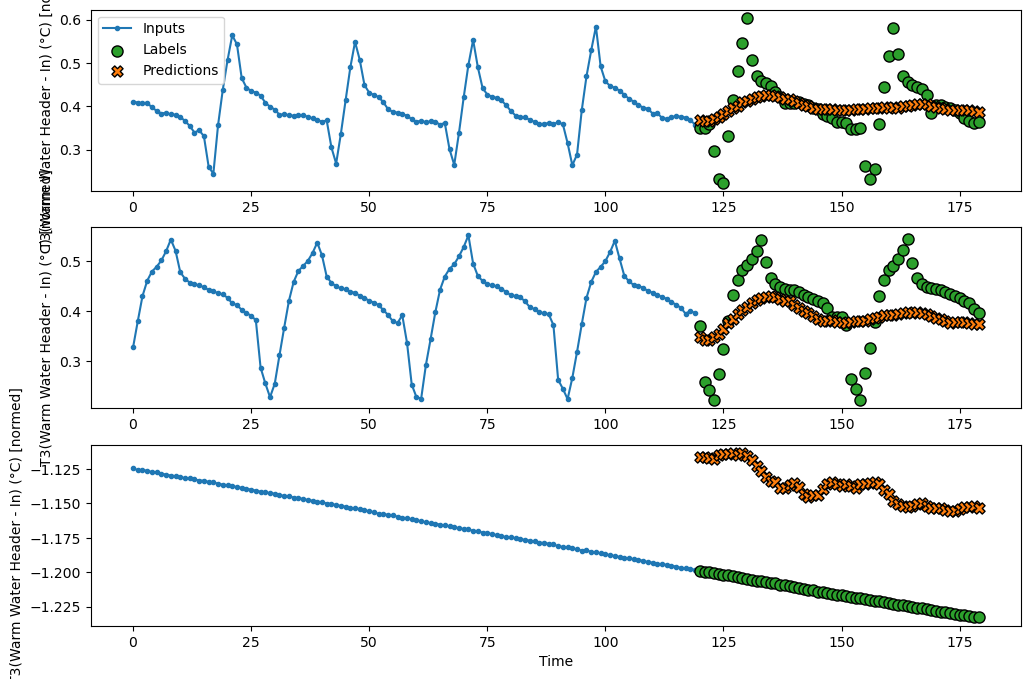

c1d-20-0.1-512
Epoch 1/20
205/205 [==============================] - 43s 188ms/step - loss: 0.4121 - mean_absolute_error: 0.3545 - val_loss: 0.2568 - val_mean_absolute_error: 0.3404
Epoch 2/20
205/205 [==============================] - 39s 187ms/step - loss: 0.1443 - mean_absolute_error: 0.2116 - val_loss: 0.1603 - val_mean_absolute_error: 0.2600
Epoch 3/20
205/205 [==============================] - 39s 188ms/step - loss: 0.1238 - mean_absolute_error: 0.1879 - val_loss: 0.1005 - val_mean_absolute_error: 0.2255
Epoch 4/20
205/205 [==============================] - 39s 187ms/step - loss: 0.1274 - mean_absolute_error: 0.1889 - val_loss: 0.1293 - val_mean_absolute_error: 0.2564
Epoch 5/20
205/205 [==============================] - 39s 187ms/step - loss: 0.1103 - mean_absolute_error: 0.1778 - val_loss: 0.0794 - val_mean_absolute_error: 0.1958
Epoch 6/20
205/205 [==============================] - 39s 188ms/step - loss: 0.0906 - mean_absolute_error: 0.1660 - val_loss: 0.0866 - val_mean_absolu

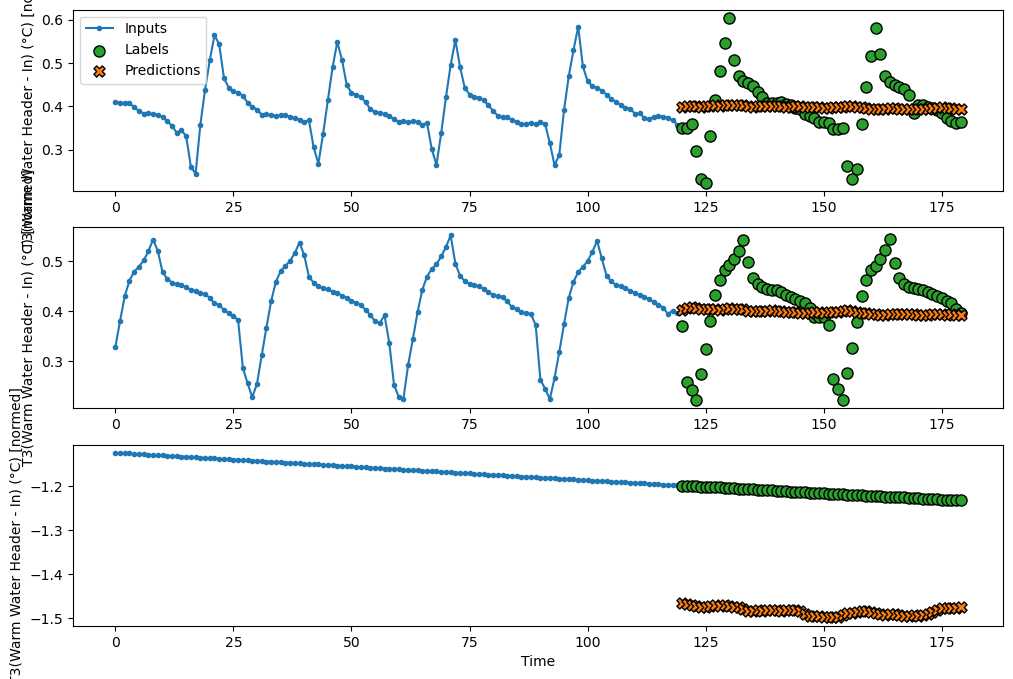

c1d-20-0.1-1024
Epoch 1/20
205/205 [==============================] - 115s 537ms/step - loss: 0.9611 - mean_absolute_error: 0.3472 - val_loss: 0.2091 - val_mean_absolute_error: 0.3071
Epoch 2/20
205/205 [==============================] - 110s 533ms/step - loss: 0.1392 - mean_absolute_error: 0.2026 - val_loss: 0.1614 - val_mean_absolute_error: 0.2781
Epoch 3/20
205/205 [==============================] - 110s 535ms/step - loss: 0.1183 - mean_absolute_error: 0.1820 - val_loss: 0.1235 - val_mean_absolute_error: 0.2444
Epoch 4/20
205/205 [==============================] - 111s 538ms/step - loss: 0.1222 - mean_absolute_error: 0.1831 - val_loss: 0.1307 - val_mean_absolute_error: 0.2531
Epoch 5/20
205/205 [==============================] - 110s 537ms/step - loss: 0.1017 - mean_absolute_error: 0.1734 - val_loss: 0.1205 - val_mean_absolute_error: 0.2310
Epoch 6/20
205/205 [==============================] - 111s 539ms/step - loss: 0.0908 - mean_absolute_error: 0.1651 - val_loss: 0.1708 - val_mean

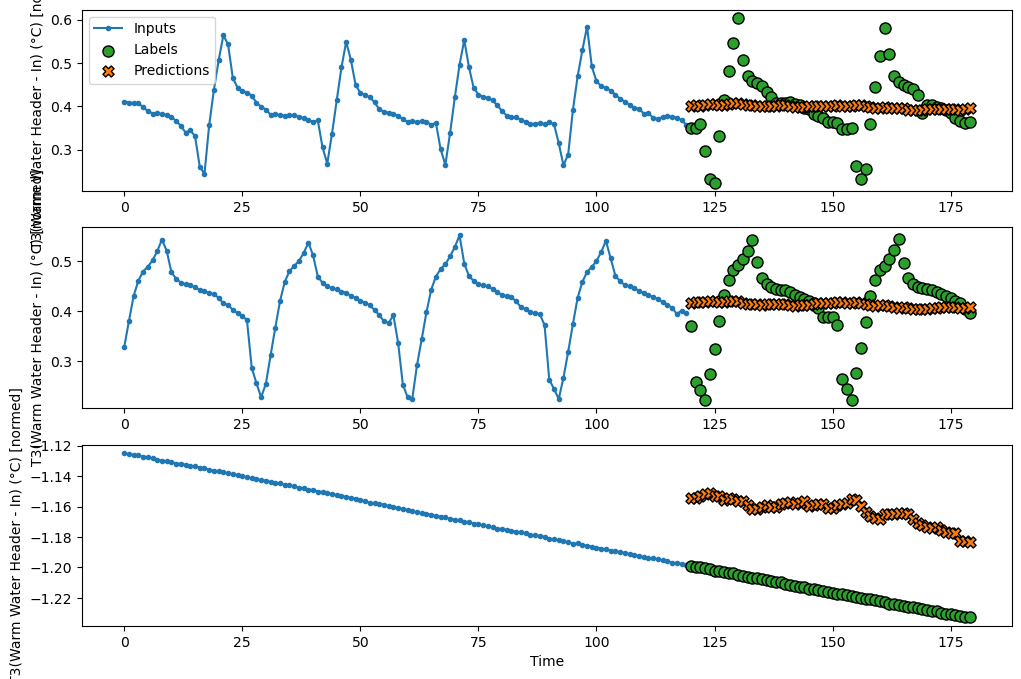

c1d-20-0.1-2048
Epoch 1/20
205/205 [==============================] - 393s 2s/step - loss: 2.3388 - mean_absolute_error: 0.3821 - val_loss: 0.2664 - val_mean_absolute_error: 0.3550
Epoch 2/20
205/205 [==============================] - 384s 2s/step - loss: 0.1392 - mean_absolute_error: 0.1985 - val_loss: 0.1982 - val_mean_absolute_error: 0.2938
Epoch 3/20
205/205 [==============================] - 394s 2s/step - loss: 0.1359 - mean_absolute_error: 0.1945 - val_loss: 0.1690 - val_mean_absolute_error: 0.2681
Epoch 4/20
205/205 [==============================] - 385s 2s/step - loss: 0.1279 - mean_absolute_error: 0.1873 - val_loss: 0.1186 - val_mean_absolute_error: 0.2343
Epoch 5/20
205/205 [==============================] - 386s 2s/step - loss: 0.1249 - mean_absolute_error: 0.1846 - val_loss: 0.1175 - val_mean_absolute_error: 0.2368
Epoch 6/20
205/205 [==============================] - 386s 2s/step - loss: 0.1160 - mean_absolute_error: 0.1773 - val_loss: 0.0947 - val_mean_absolute_error: 0

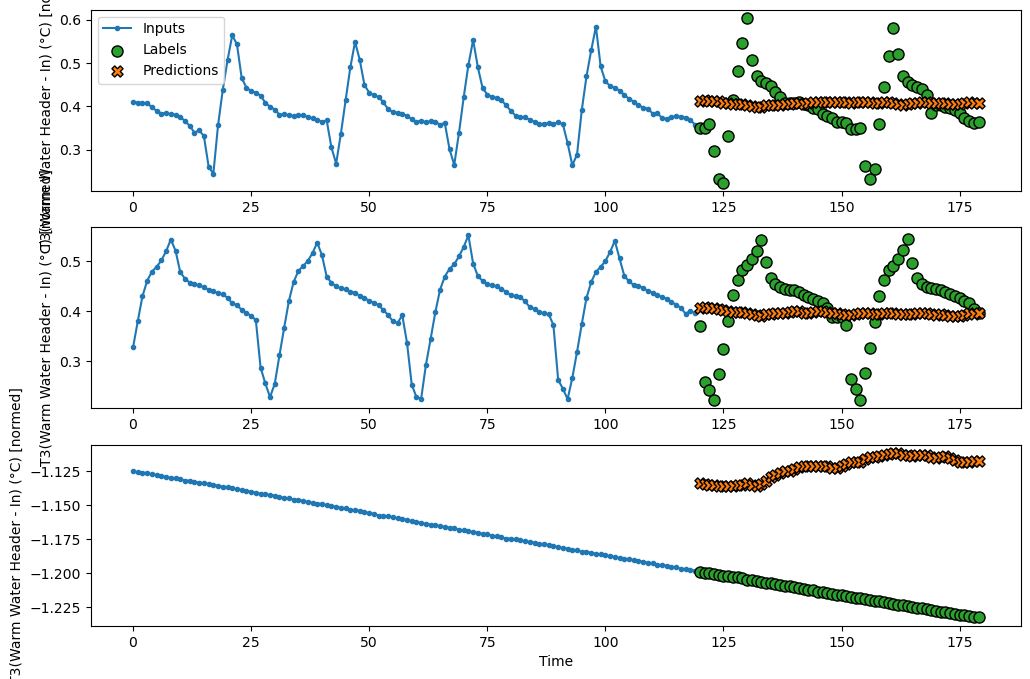

c1d-20-0.1-512
Epoch 1/20
205/205 [==============================] - 66s 290ms/step - loss: 1.3264 - mean_absolute_error: 0.5779 - val_loss: 0.4907 - val_mean_absolute_error: 0.5544
Epoch 2/20
205/205 [==============================] - 59s 288ms/step - loss: 1.0005 - mean_absolute_error: 0.5698 - val_loss: 0.4953 - val_mean_absolute_error: 0.5577
Epoch 3/20
59/59 [==============================] - 6s 92ms/step - loss: 0.4966 - mean_absolute_error: 0.5586


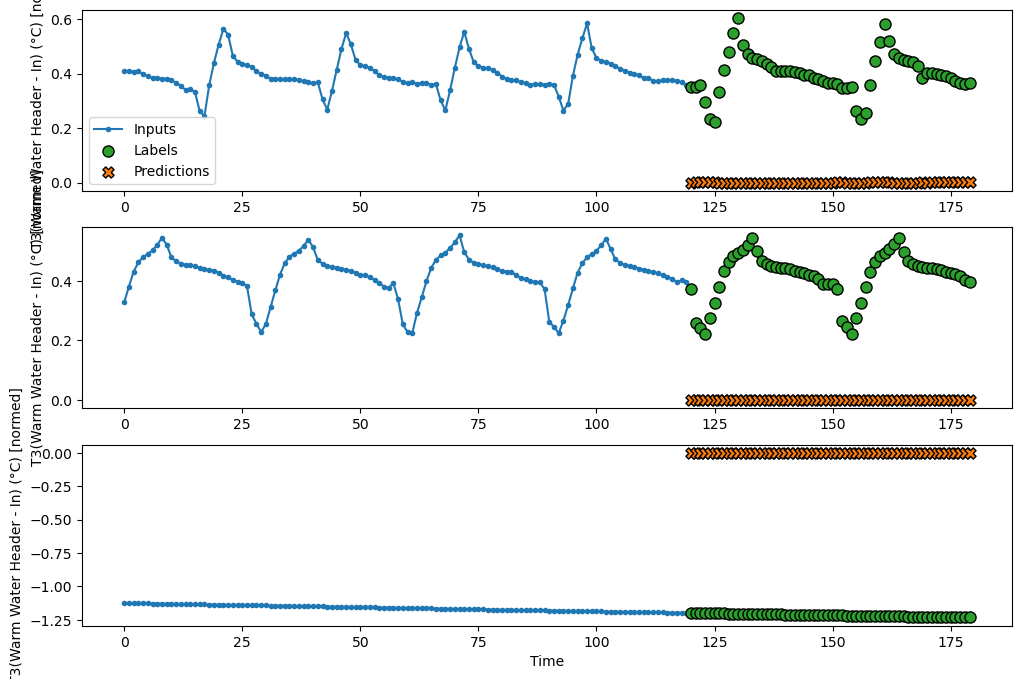

c1d-20-0.1-1024
Epoch 1/20
205/205 [==============================] - 283s 1s/step - loss: 1.0110 - mean_absolute_error: 0.5702 - val_loss: 0.4950 - val_mean_absolute_error: 0.5585
Epoch 2/20
205/205 [==============================] - 277s 1s/step - loss: 1.0005 - mean_absolute_error: 0.5705 - val_loss: 0.4944 - val_mean_absolute_error: 0.5580
Epoch 3/20
205/205 [==============================] - 264s 1s/step - loss: 1.0005 - mean_absolute_error: 0.5704 - val_loss: 0.4938 - val_mean_absolute_error: 0.5579
Epoch 4/20
205/205 [==============================] - 257s 1s/step - loss: 1.0005 - mean_absolute_error: 0.5705 - val_loss: 0.4945 - val_mean_absolute_error: 0.5583
Epoch 5/20
59/59 [==============================] - 27s 443ms/step - loss: 0.4951 - mean_absolute_error: 0.5587


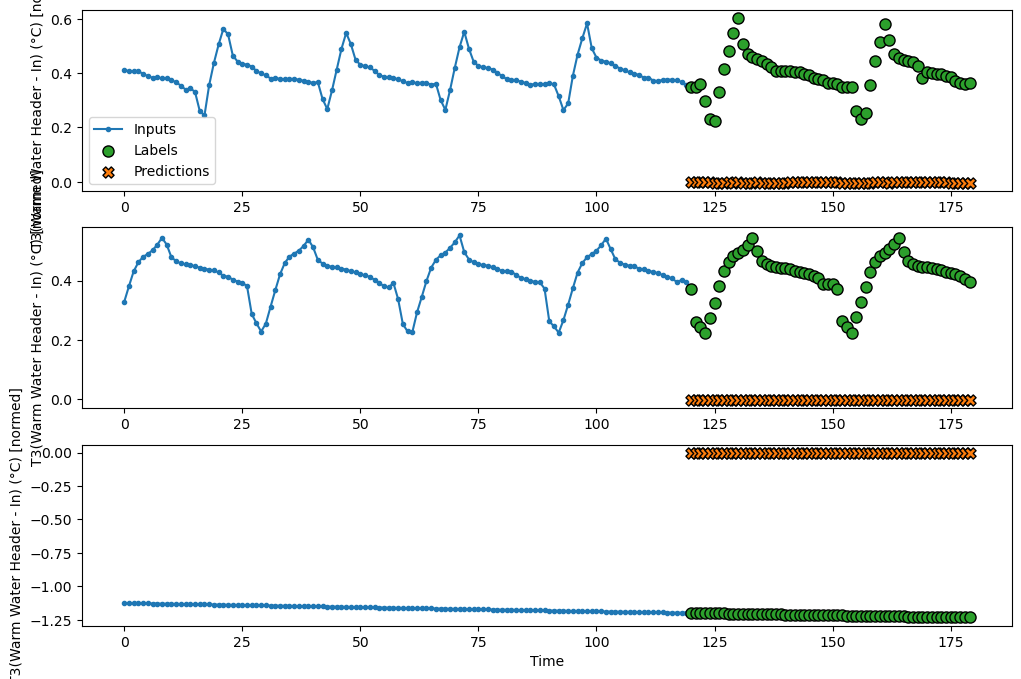

c1d-20-0.1-2048
Epoch 1/20
205/205 [==============================] - 1091s 5s/step - loss: 1221.0614 - mean_absolute_error: 1.1203 - val_loss: 0.4949 - val_mean_absolute_error: 0.5590
Epoch 2/20
 86/205 [===========>..................] - ETA: 9:24 - loss: 1.0227 - mean_absolute_error: 0.5544

In [ ]:
for CONV_WIDTH in [20, 30]:
    for dropout in [0.1, 0.2, 0.3]:
        for lay in [2, 6, 12, 20]:
            for nn in [512, 1024, 2048]:
                #CONV_WIDTH = 30
                print(f'c1d-{CONV_WIDTH}-{dropout}-{nn}')
                multi_lstm_model = tf.keras.Sequential([
                    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
                    # Shape => [batch, 1, conv_units]
                    tf.keras.layers.Conv1D(nn, activation='relu', kernel_size=(CONV_WIDTH)),
                    tf.keras.layers.Dropout(dropout),
                ])

                for l in range(lay):
                    multi_lstm_model.add(tf.keras.layers.Dense(nn, activation='relu'))
                    multi_lstm_model.add(tf.keras.layers.Dropout(dropout))
                # Shape => [batch, 1,  out_steps*features]
                multi_lstm_model.add(tf.keras.layers.Dense(OUT_STEPS*num_features,
                                      kernel_initializer=tf.initializers.zeros()))
                # Shape => [batch, out_steps, features]
                multi_lstm_model.add(tf.keras.layers.Reshape([OUT_STEPS, num_features]))

                history = compile_and_fit(multi_lstm_model, multi_window)

                multi_val_performance[f'c1d-{CONV_WIDTH}-{dropout}-{nn}'] = multi_lstm_model.evaluate(multi_window.val)
                multi_window.plot(multi_lstm_model, plot_col=df.columns[0])
                plt.show()
                #multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)

In [ ]:
for i in range(5):
    multi_window.plot(multi_lstm_model, plot_col=df.columns[i])